

1.   All the data in numerical formate
2.   Drop the un-necessary columns
3.   Taking care of Missing values
        *   if the number of missing rows is less than 20%- imputation
        *   if missing is greater than 20% - remove the columns
4.   Create Heatmap to understand the relationship between feature and target
5.   Separate the Input and Output
6.   Split the dataset
7.   Perform the fit
8.   Generate predition on test date
9.   Evaluate the model on test data

# Regression

### Fetch Data

In [1]:
!wget https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/auto-mpg.csv

--2023-01-05 02:11:34--  https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/auto-mpg.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18131 (18K) [text/plain]
Saving to: ‘auto-mpg.csv’

auto-mpg.csv        100%[===================>]  17.71K  --.-KB/s    in 0.001s  

2023-01-05 02:11:35 (12.4 MB/s) - ‘auto-mpg.csv’ saved [18131/18131]



### Import Liberaries and Read the data

In [2]:
import pandas as pd
df = pd.read_csv('auto-mpg.csv')
df.head()

# mpg - output

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### All the data in numerical formate

In [15]:
df1 = df.drop(columns='car name')

print(df1.info())
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB
None


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


### Taking care of Missing values
*  if the number of missing rows is less than 20%- imputation
*  if missing is greater than 20% - remove the columns

In [16]:
df1.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [18]:
data = df1[df1['horsepower'] !='?']

data['horsepower'] = pd.to_numeric(data['horsepower'])

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 27.6 KB
None


<ipython-input-18-ac43cb2f5e41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['horsepower'] = pd.to_numeric(data['horsepower'])


### Create Heatmap to understand the relationship between feature and target

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = data.corr() # return correlation coefficient
correlation

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


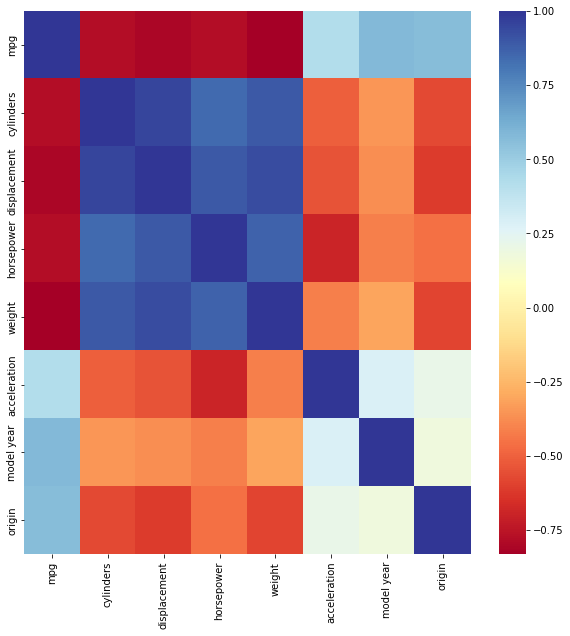

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cmap='RdYlBu')
plt.show()

### Seperate input and output

In [30]:
x= data.drop(columns='mpg')
y= data["mpg"]
x,y

(     cylinders  displacement  horsepower  weight  acceleration  model year  \
 0            8         307.0         130    3504          12.0          70   
 1            8         350.0         165    3693          11.5          70   
 2            8         318.0         150    3436          11.0          70   
 3            8         304.0         150    3433          12.0          70   
 4            8         302.0         140    3449          10.5          70   
 ..         ...           ...         ...     ...           ...         ...   
 393          4         140.0          86    2790          15.6          82   
 394          4          97.0          52    2130          24.6          82   
 395          4         135.0          84    2295          11.6          82   
 396          4         120.0          79    2625          18.6          82   
 397          4         119.0          82    2720          19.4          82   
 
      origin  
 0         1  
 1         1  
 2   

### Split the values for Train and Test

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [32]:
# Check the X_train and X_test shapes

print(X_train.shape)
print(X_test.shape)

(313, 7)
(79, 7)


### Performing fit


In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [34]:
lr.fit(X_train,y_train)

LinearRegression()

### Generate predition on test date

In [35]:
#Scope of the line
lr.coef_

array([-0.39034654,  0.01743605, -0.01026837, -0.00678792,  0.14137908,
        0.74133968,  1.12829334])

In [36]:
lr.intercept_ # intercept

-16.89106671405489

In [37]:
from sklearn.metrics import r2_score
y_pred = lr.predict(X_train)
r2_score(y_train,y_pred)

0.8165058068251202

### Evaluate the model on test data

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [40]:
mean_squared_error(y_train, y_pred)

11.083901287365627

In [41]:
mean_absolute_error(y_train,y_pred)

2.5461671792661464

In [42]:
# Root Mean Squared Error
mean_squared_error(y_train, y_pred, squared=False)

3.329249357943263

#Classification

### Fetch Data

In [60]:
!wget https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/Iris.csv

--2023-01-05 03:32:41--  https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/Iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5107 (5.0K) [text/plain]
Saving to: ‘Iris.csv.1’

Iris.csv.1          100%[===================>]   4.99K  --.-KB/s    in 0s      

2023-01-05 03:32:41 (50.3 MB/s) - ‘Iris.csv.1’ saved [5107/5107]



### Import Liberaries and Read the data

In [61]:
import pandas as pd
import numpy as np

df_iris = pd.read_csv('Iris.csv')
df_iris.head()

# for output encoder --> LabelEncoder()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [62]:
df_iris['Species'].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [63]:
pd.get_dummies(df_iris)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,0,0,1
146,147,6.3,2.5,5.0,1.9,0,0,1
147,148,6.5,3.0,5.2,2.0,0,0,1
148,149,6.2,3.4,5.4,2.3,0,0,1


### Taking care of Missing values

In [64]:
df_iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Converting Species to LabelEncoder as its output

In [65]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_iris['Species']= label_encoder.fit_transform(df_iris['Species'])
  
df_iris['Species'].unique()

array([0, 1, 2])

In [66]:
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


### Seperate input and output

In [67]:
X = df_iris.drop(columns='Species') # inplace=False
y = df_iris['Species']

### Split the values for Train and Test

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [69]:
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


### Performing fit

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
log = LogisticRegression()
log.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Generate predition on test date

In [72]:
y_pred = log.predict(X_test)

In [73]:
y_pred[:5]

array([1, 0, 2, 1, 1])

In [74]:
y_test[:5]

73     1
18     0
118    2
78     1
76     1
Name: Species, dtype: int64

### Evaluate the model on test data

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0